# Human Activity Recognition using LSTM

In [119]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout

# Data Cleaning & Preprocessing

In [120]:
#open data.txt
file = open('data.txt')
lines = file.readlines()
#process lines and insert data to a list
processedList = []
for i, line in enumerate(lines):
    try:
        line = line.split(',')
        last = line[5].split(';')[0]
        last = last.strip()
        if last == '':
            break;
        temp = [line[0], line[1], line[2], line[3], line[4], last]
        processedList.append(temp)
    except:
        print(f'An error happend in processing data line : {i}')

An error happend in processing data line : 281873
An error happend in processing data line : 281874
An error happend in processing data line : 281875


In [121]:
#create a DataFrame with the processed data and proper column names 
columns = ['User', 'Activity', 'Time', 'x', 'y', 'z']
data = pd.DataFrame(data = processedList, columns = columns)
data.head()

,User,Activity,Time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [122]:
#convert x,y,z to floar data type (Its string)
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')

# Analyzing class label distribution

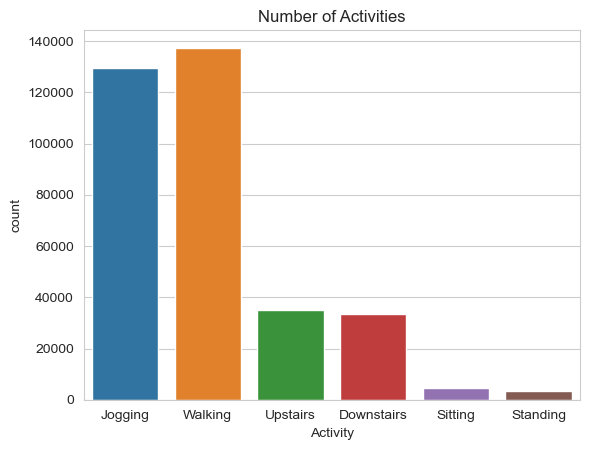

In [123]:
sns.set_style('whitegrid')
sns.countplot(x = 'Activity', data = data)
plt.title('Number of Activities')
plt.show()

# Preparing Data

In [124]:
#The LSTM model expects fixed-length sequences as training data
#Each generated sequence (or window)
#contains 50 records corresponding to 2.5 secs of activity 
random_seed = 42   
n_time_steps = 50 
n_features = 3 
step = 10 
n_classes = 6 
n_epochs = 50       
batch_size = 1024   
learning_rate = 0.0025
l2_loss = 0.0015

segments = []
labels = []

for i in range(0,  df.shape[0]- n_time_steps, step):  

    xs = data['x'].values[i: i + 50]

    ys = data['y'].values[i: i + 50]

    zs = data['z'].values[i: i + 50]

    label = stats.mode(df['Activity'][i: i + 50])[0][0]

    segments.append([xs, ys, zs])

    labels.append(label)

#reshape the segments 
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, n_time_steps, n_features)

labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

C:\Users\Alireza\AppData\Local\Temp\ipykernel_12164\543383494.py:25: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(df['Activity'][i: i + 50])[0][0]
C:\Users\Alireza\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\Alireza\AppData\Local\Temp\ipykernel_12164\543383494.py:25: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used in

we have considered overlapping windows (with 80% overlap) of data

In [125]:
reshaped_segments.shape

(34337, 50, 3)

# Splitting data into train and test sets

In [126]:
X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size = 0.2, random_state = random_seed)

# Building Model Architecture

In [127]:
model = Sequential()
# RNN layer
model.add(LSTM(units = 128, input_shape = (X_train.shape[1], X_train.shape[2])))
# Dropout layer
model.add(Dropout(0.5)) 
# Dense layer with ReLu
model.add(Dense(units = 64, activation='relu'))
# Softmax layer
model.add(Dense(y_train.shape[1], activation = 'softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [128]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               67584     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 6)                 390       
                                                                 
Total params: 76,230
Trainable params: 76,230
Non-trainable params: 0
_________________________________________________________________


In [129]:
#train our model 50 epochs
history = model.fit(X_train, y_train, epochs = n_epochs, validation_split = 0.20, batch_size = batch_size, verbose = 1)

Epoch 1/50
22/22 [==============================] - 9s 334ms/step - loss: 1.3585 - accuracy: 0.4808 - val_loss: 0.8519 - val_accuracy: 0.7181
Epoch 2/50
22/22 [==============================] - 7s 314ms/step - loss: 0.7034 - accuracy: 0.7697 - val_loss: 0.5623 - val_accuracy: 0.8134
Epoch 3/50
22/22 [==============================] - 7s 313ms/step - loss: 0.5589 - accuracy: 0.8037 - val_loss: 0.4793 - val_accuracy: 0.8220
Epoch 4/50
22/22 [==============================] - 6s 278ms/step - loss: 0.4919 - accuracy: 0.8223 - val_loss: 0.4313 - val_accuracy: 0.8420
Epoch 5/50
22/22 [==============================] - 6s 270ms/step - loss: 0.4526 - accuracy: 0.8371 - val_loss: 0.3927 - val_accuracy: 0.8600
Epoch 6/50
22/22 [==============================] - 6s 286ms/step - loss: 0.4226 - accuracy: 0.8473 - val_loss: 0.3790 - val_accuracy: 0.8617
Epoch 7/50
22/22 [==============================] - 6s 281ms/step - loss: 0.3960 - accuracy: 0.8562 - val_loss: 0.3379 - val_accuracy: 0.8757
Epoch 

# Plotting training and validation accuracy

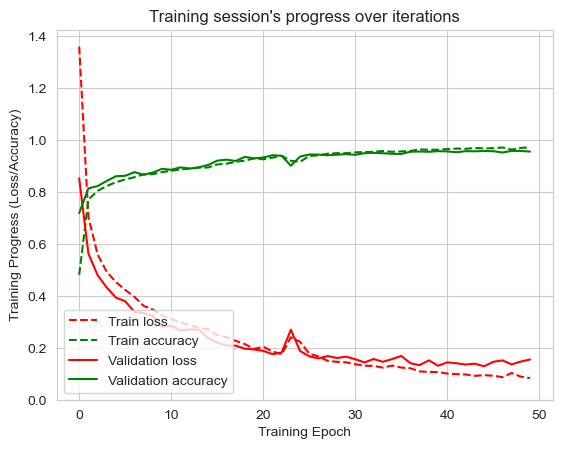

In [130]:
plt.plot(np.array(history.history['loss']), "r--", label = "Train loss")
plt.plot(np.array(history.history['accuracy']), "g--", label = "Train accuracy")
plt.plot(np.array(history.history['val_loss']), "r-", label = "Validation loss")
plt.plot(np.array(history.history['val_accuracy']), "g-", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='lower left')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0) 
plt.show()